# Approximating the Normal Distribution
    
Many statistical methods assume approximately normal input data. In this section we
will explore the meaning of this assumption for practical applications.

In [1]:
%reload_ext rpy2.ipython

We start with 50 random values from $N(\mu = 10, \sigma = 2)$ i.e. the
normal distribution with a mean of 10 and a standard deviation of 2.
The normal distribution is also known as Gaussian, and the shape of the histogram
is often called the bell curve.

In [2]:
%%R
x <- rnorm(50, 10, 2)
x

 [1]  6.785457 13.194239 10.879253 10.452611  8.545275 11.271964  8.916227
 [8]  9.384594 10.934346 14.032779 10.177031 11.480267 10.760394 12.764003
[15] 11.712794  9.221546  7.242091 10.696043  9.567880 12.434910 12.903545
[22] 10.571311 12.587417 10.952508  9.644092  6.965270  9.433009 11.050434
[29] 10.263620  9.262794 10.237841 12.912700  9.188580 12.290826 13.383824
[36]  8.448024 13.365851 11.176043  7.829264 12.567732 12.254545 10.117489
[43]  6.202374 13.303897 10.079346  9.412429  7.377400 11.742601 12.111854
[50]  8.325226


Of course the sample mean and standard deviation are somewhat different.

In [3]:
%%R
mean(x)

[1] 10.52831


In [4]:
%%R
sd(x)

[1] 1.949307


The histogram shows that the values are only very roughly normally distributed, if at all.
We cannot recognize a bell shape.

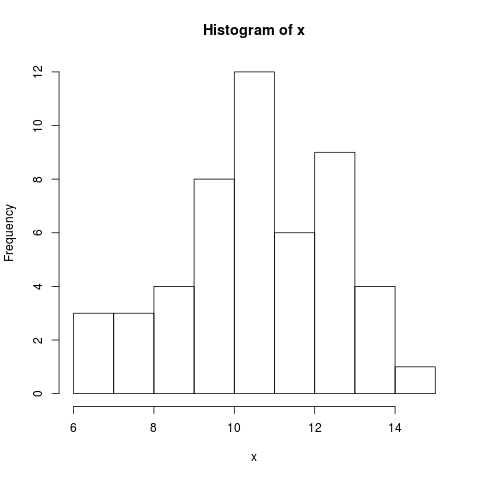

In [5]:
%%R
hist(x)

When using this code in an R script put *png('hist-rnorm.png')* before the plot command, 
and *dev.off()* afterwards in order to
print the plot to an image file. The image can then be included in an HTML page
and viewed remotely via the web
by putting everything into the www or public_html directory.

With 500 values the resemblence with the bell shape of the normal distribution becomes more
apparent:
    

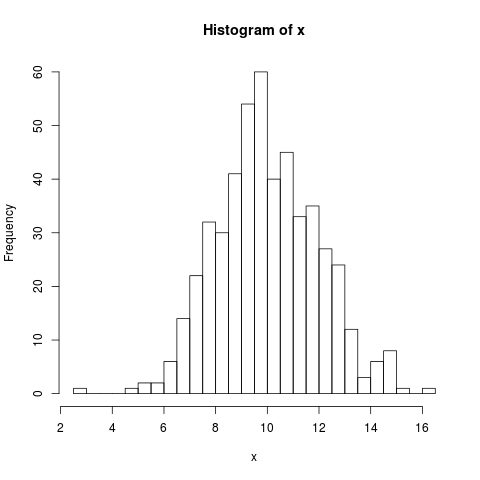

In [6]:
%%R
x <- rnorm(500, 10, 2)
hist(x, breaks=21)

The normal distribution is a theoretical distribution that is rarely found
in nature; however, 
under certain conditions real-world data
can be sufficiently close i.e. approximately normally distributed. To explore that 
idea let's cast a fair six-sided dice a number of times.

In R we can use the sample() function to draw with equal probability from
a given list of values, such as the numbers from 1 to 6.
We only print the first few values.

In [7]:
%%R
x <- sample(1:6, 500, replace = TRUE)
x[1:50]

 [1] 4 3 4 1 2 2 1 4 1 5 2 5 2 1 6 1 3 2 6 6 2 2 2 1 6 5 4 1 1 3 5 2 1 6 1 6 4 5
[39] 3 3 5 3 6 1 2 2 3 4 5 3


The hist() function is oriented towards continuous data; for discrete
values the combination of plot() and table() produces better results.

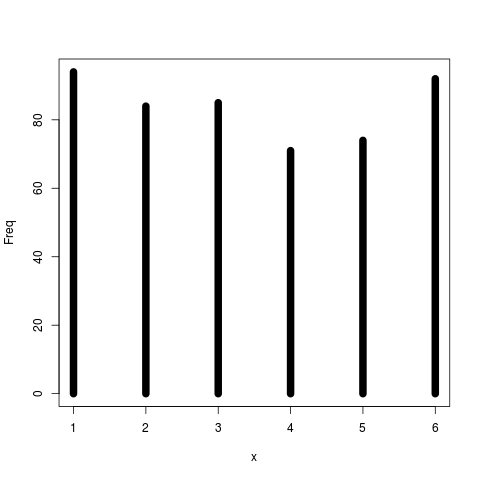

In [8]:
%%R
plot(table(x), type="h", lwd=10, ylab="Freq")

The result shows a roughly uniform distribution, as we would expect from a
fair dice.
What happens if we cast two dice, sum their values, and observe the
frequencies of the <u>sums</u>?

To do this in R, we create a sample twice as large, form a matrix with two
rows, and compute the column sums:

In [9]:
%%R
y <- sample(1:6, 2000, replace = TRUE) 
m <- matrix(y, 2, 1000)
s <- colSums(m)
s[1:50]

 [1] 12 11  5  4  5  6  4  6  4  8  2  7  7  6  6  7  7  6  4  6  5  7  7  7 11
[26]  2  8 10  9  3 10 12  4  9  7 11  8  8  8  6  6  7  5  9  3  7 12  6  9  6


Note that when we trow two dice the sum of 2 (and 12) occurs less
      frequently than sums around 7.
      Therefore, the sums do <u>not</u> show a uniform distribution in the
      histogram.
    

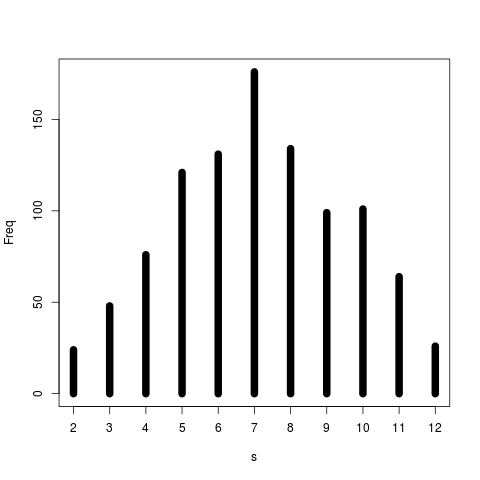

In [10]:
%%R
plot(table(s), type="h", lwd=10, ylab="Freq")

What will happen if we increase the number of dice and casts?

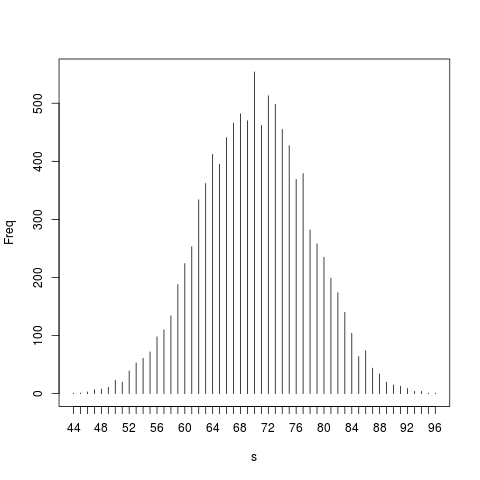

In [17]:
%%R
ndice <- 20
ncast <- 10000
x <- sample(1:6, ncast * ndice, replace = TRUE)
m <- matrix(x, ndice, ncast)
s <- colSums(m)
plot(table(s), type="h", lwd=1, ylab="Freq")

__When we repeatedly draw a sufficiently large sample of random values the
resulting distribution of the <u>sums</u> is approximately normal.__

Note that the distribution in the above figure is still not actually a
normal distribution, for several reasons, most importantly

* the normal distribution is defined on continuous values, while the sum
  of dice are discrete values
* in the normal distribution there is a non-zero probability for any value
  x with $-\infty < x < \infty$, while the sum of n six-sided dice
  can of course never be less than n or greater than n * 6

What happens to the sums if the original distribution is not uniform?

Consider an unfair dice, such as this one, where the probability of 6 is
increased:

In [13]:
%%R
sample(c(1,2,3,4,5,6,6,6), 100, replace=TRUE)

  [1] 6 6 2 6 5 4 6 5 1 2 6 6 6 6 2 6 2 6 4 6 6 6 5 6 1 4 4 6 3 2 6 3 6 1 6 3 1
 [38] 6 3 6 6 6 1 6 4 6 5 1 6 6 5 4 1 6 5 1 6 6 5 5 1 6 2 6 4 2 6 4 3 5 6 4 2 5
 [75] 4 2 2 1 5 4 6 2 1 5 6 4 1 3 4 5 2 3 3 4 3 6 1 6 6 6


This dice will produce the result 6 much more frequently than a fair dice,
so the distribution of the individual dice values is far from uniform.

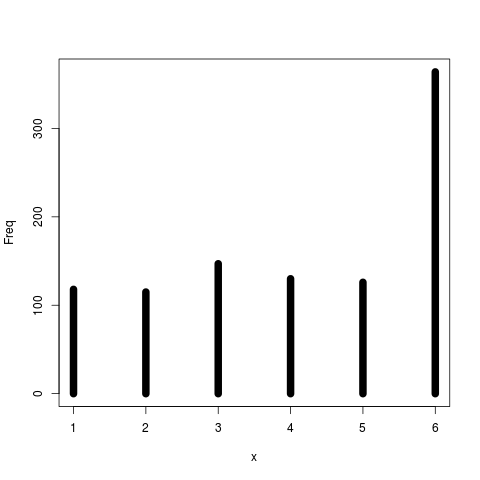

In [14]:
%%R
x <- sample(c(1,2,3,4,5,6,6,6), 1000, replace=TRUE)
plot(table(x), type="h", lwd=10, ylab="Freq")

We repeat out experiment, this time drawing from the modified sample list:

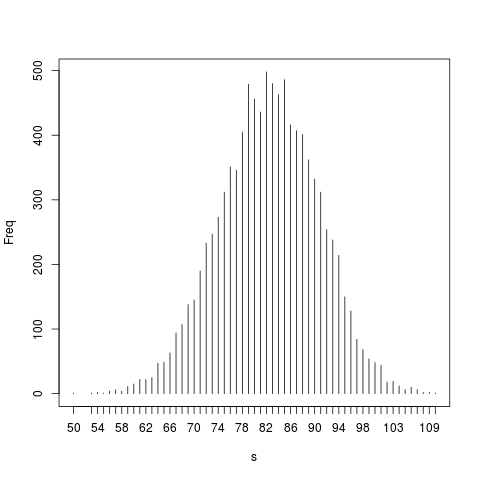

In [19]:
%%R
lst <- c(1,2,3,4,5,6,6,6) 
ndice <- 20 
ncast <- 10000
x <- sample(lst, ncast * ndice, replace = TRUE)
m <- matrix(x, ndice, ncast)
s <- colSums(m)
plot(table(s), type="h", lwd=1, ylab="Freq")

When we plot the sums of 20 unfair dice over 10000 tosses the distribution
has shifted to the right, but other than that the picture again shows
the familiar bell shape.

The observations in this section are a consequence of the
central limit theorem. There are several aspects to this theorem; a common
formulation is:

__The <u>sum</u> of many independent and identically
distributed random variables with finite variance will tend to be
distributed according to the normal distribution.__

This is happening in many practical situations, although whether the approximation to
the normal distribution is actually close enough for reliable results from statistical
tests and other methods depends on the application. 

From a practical point of view, we would like to have at least some ballpark figure: How many values do we need to sum in order to achieve
"approximately normal", regardless of the distribution of the individual values? For the next sections and the examples in this text,
as well as many situations involving real-world data,
the short answer $N\ge 20$ will serve as a very rough guide.